In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import pandas as pd
from helpers import *
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.gridspec as gridspec

In [3]:
num_topics = 50
d = "topics/topics_"+str(num_topics)+"/"
sns.set(style='whitegrid')

In [4]:
print("Loading books...")
books = get_book_txts("data/coref_resolved_txts", splitlines=True)

Loading books...
Getting books...
America_A_Narrative_History_WWNorton_10th
America_Past_And_Present_Pearson_10th
Americas_History_Bedford_8th
Give_Me_Liberty_An_American_History_WWNorton_3rd
The_American_Pageant_Cengage_14th
The_Unfinished_Nation_A_Concise_History_of_the_American_People_McGraw-Hill_8th
Visions_of_America_A_History_of_the_United_States_Pearson_2nd
american_history_connecting_with_the_past
by_the_people
history_alive_united_states_thru_industrialism
hmh_the_americans_us_history_since_1877
mastering_the_teks
pearson_us_history
teks_us_history
us_history_early_colonial_period_through_reconstruction


In [5]:
means = []
medians = []
for k, v in books.items():
    paragraphs = [len(s.split()) for s in v]
    means.append(np.mean(paragraphs))
    medians.append(np.median(paragraphs))
print(np.mean(means))
print(np.std(means))
print(np.min(means))
print(np.max(means))

67.67266705716371
33.98822054458773
27.436693866807055
129.7970099667774


In [ ]:
print('Combining data and cleaning data...')
book_texts = {}
for k, v in books.items():
    book_texts[k] = [sent for l in v for sent in
                     nltk.sent_tokenize(l) if len(sent) >= 15]


titles = sorted(books.keys())
all_text = []
book2length = []
for title in titles:
    texts = book_texts[title]
    book2length.append((title, len(texts)))
    for t in texts:
        all_text.append(t)

In [6]:
means = []
medians = []
for k, v in book_texts.items():
    paragraphs = [len(s.split()) for s in v]
    means.append(np.mean(paragraphs))
    medians.append(np.median(paragraphs))
print(np.mean(means))
print(np.std(means))
print(np.min(means))
print(np.max(means))

18.11726827861244
2.585727662053552
14.022936939213952
21.055008334596153


In [7]:
all_text[:10]

['History is filled with ironies.',
 'Luck and accidents—the unexpected and unplanned happenings of \xadlife—\u200b\xadoften shape events more than intentions.',
 'Long before Christopher Columbus lucked upon the Caribbean Sea and an unexpected continent in his effort to find a westward passage to the Indies (east Asia), the native peoples his mislabeled "Indians" had occupied and transformed the lands of the Western Hemisphere (also called the \xadAmericas—\u200b \xadNorth, Central, and South).',
 'Initially, everyone in what came to be called America came from somewhere else.',
 'By 1492, when Columbus began his voyage west from Spain across an uncharted ocean, there were millions of Native Americans living in the Western Hemisphere.',
 'The "New World" his found was new only to the Europeans who began exploring, conquering, and exploiting the region at the end of the fifteenth century.',
 'Over thousands of years, Native American peoples had developed highly sophisticated societies.

## Average sentence length

In [8]:
sent_lengths = []
for k, v in book_texts.items():
    sent_lengths.extend([len(sent.split(" ")) for sent in v])

In [9]:
np.median(sent_lengths)

16.0

In [10]:
np.std(sent_lengths)

10.994001338802448

## Examine topics

In [14]:
doc_topic_file =  d+ 'doc-topics.gz'
doc_topics = open(doc_topic_file).read().splitlines()
print(len(doc_topics), 'articles total')

FileNotFoundError: [Errno 2] No such file or directory: 'topics/topics_50/doc-topics.gz'

In [12]:
doc_topic_mat = np.array([[float(n) for n in l.strip().split("\t")[2:]] for l in doc_topics])

In [13]:
doc_topic_mat.shape

(358232, 50)

In [14]:
len(all_text)

358232

In [15]:
all_text = []
book2length = []
for title, texts in book_texts.items():
    book2length.append((title, len(texts)))
    for t in texts:
        all_text.append(t)

In [16]:
topic_names = json.load(open(d + 'topic_names.json', 'r'))

In [17]:
topic_names

{'0': 'govern,power,feder,nation,peopl,author,constitut,state,system,unit',
 '1': 'crime,charg,prison,accus,trial,critic,convict,public,communist,murder',
 '10': 'water,river,cattl,miner,mountain,gold,mine,food,west,forest',
 '11': 'social,reform,polit,progress,econom,societi,interest,class,effort,system',
 '12': 'popular,show,imag,paint,artist,photograph,depict,music,televis,audienc',
 '13': 'act,pass,law,congress,legisl,bill,immigr,feder,reconstruct,prohibit',
 '14': 'debat,conflict,tension,polit,issu,continu,divis,cold war,era,controversi',
 '15': 'citi,york,urban,hous,live,town,center,communiti,move,chicago',
 '16': 'bank,money,tax,pay,debt,loan,rais,fund,paid,govern',
 '17': 'king,march,day,protest,washington,demonstr,polic,martin luther,mob,black',
 '18': 'percent,million,number,popul,year,immigr,increas,half,larg,total',
 '19': 'indian,nativ,land,tribe,west,settler,american,white,western,frontier',
 '2': 'english,england,virginia,coloni,pennsylvania,settler,governor,establish,yo

In [18]:
for t in doc_topic_mat.mean(axis=0).argsort()[::-1]:
    print("%.4f" % doc_topic_mat.mean(axis=0)[t], ";", topic_names[str(t)])

0.0220 ; armi,general,confeder,troop,union,forc,command,battl,british,victori
0.0218 ; democrat,parti,republican,elect,vote,candid,won,voter,major,popular
0.0213 ; read,inform,sourc,newspap,write,book,chapter,map,publish,learn
0.0213 ; man,hand,boy,thing,back,day,eye,told,cloth,dress
0.0211 ; centuri,industri,chang,growth,develop,economi,econom,revolut,region,increas
0.0210 ; european,north,america,spanish,explor,empir,europ,trade,spain,africa
0.0210 ; water,river,cattl,miner,mountain,gold,mine,food,west,forest
0.0209 ; unit,war,world,state,nation,civil,end,power,america,year
0.0208 ; explain,identifi,role,describ,effect,event,analyz,play,import,impact
0.0206 ; german,germani,soviet,alli,franc,soviet union,europ,hitler,russia,unit
0.0204 ; cultur,societi,american,tradit,life,group,immigr,distinct,valu,reflect
0.0204 ; presid,kennedi,johnson,reagan,nixon,administr,truman,polici,eisenhow,bush
0.0203 ; popular,show,imag,paint,artist,photograph,depict,music,televis,audienc
0.0202 ; human,n

In [19]:
len(all_text)

358232

In [20]:
doc_topic_mat.shape

(358232, 50)

In [21]:
def get_topic_for_word(words):
    topics = []
    for k, v in topic_names.items():
        if any([word in v.split(",") for word in words]):
            print(k, v)
            topics.append(int(k))
    return topics

In [22]:
get_topic_for_word(["man", "men"])

5 soldier,thousand,die,kill,hundr,death,year,day,men,fight
24 human,natur,man,person,thing,moral,reason,believ,good,individu
34 man,hand,boy,thing,back,day,eye,told,cloth,dress
43 men,women,famili,children,young,work,woman,home,mother,husband


[5, 24, 34, 43]

In [41]:
def get_docs_for_topic(topic_id):
    for i, t in enumerate(np.random.choice(np.where(doc_topic_mat[:,topic_id] > 0.3)[0], 25)):
        print("%d. %s" % (i+1, all_text[t]))

In [57]:
get_docs_for_topic(43)

1. Many rejected the community's tradition of arranged marriages, insisting on choosing arranged marriages' own husbands and wives.
2. How do you thini the Great Depression changed Americans' view of themse Consider the roles of men, women, and children in society in the family.
3. If particular care and attention is not paid to the Ladies we are and will not hold we bound by Laws in which we have no voice, or Representation/^
4. While Beecher upheld high standards in women's education, Beecher and many others argued that young women should be trained not for the workplace but in the domestic ­arts—​­managing a kitchen, running a household, and nurturing the children.
5. Women's paid labor was making up for the declining earning power or the absence of men in American households.
6. Many women also carefully managed household budgets.
7. Other frolics included corn-husking bees for men and quilting bees for women.
8. Carla Rojas' mother returned home two years later, but Carla Rojas de

In [50]:
get_docs_for_topic(24)

1. This man seemed obsessed with the preservation of public virtue.
2. As the Democratic New York Herald said, "We can now thrash Mexico into decency at our leisure."
3. Any law that uplifts human personality is just.
4. their environment — for example, camouflage coloring for a moth — these characteristics, since they are genetically transmissible, become dominant in future generations.
5. ... Our decision about energy will test the character of the American people.
6. Was the purpose of conservatism, one writer wondered, to create the "free man" or the "good man"?
7. Moreover, Kennedy's sense of caution and restraint, painful and frustrating as it was to African American activists, had proved to be well-founded.
8. Carter's emphasis on human rights led Carter to alter the U.S. relationship with a number of dictators.
9. Individuals should work for self-realization by resisting pressures to conform to society's expectations and responding instead to individuals' own instincts.
10. Ind

In [29]:
get_docs_for_topic(2)

316104 When we went to rest the following night, they offered we some victuals, but we refused some victuals; and the only comfort we had was in being in one another's arms all that night, and bathing each other with we tears.
232556 and thought how useless I'd be to them were I to be found dead, my two old dogs keeping guard over me.
325906 Prudence, indeed, will dictate that Governments long established should not be changed for light and transient causes; and accordingly all experience hath shown, that mankind are more disposed to suffer, while
56871 The other a lusty young Mulatto fellow, named Toby, a slave about the same age, RAN is a well set, clean limb'd, stout fellow neither a very bright or very dark Mulatto, has large nostrils, is a likely fellow, and when RAN talks drawls RAN's words out in a very slow manner, is no other way remarkable; RAN had on the same sort of clothes with
8629 ​My mother raised the shout, my Christian friends crowded around Peter Cartwright and joine

In [31]:
get_docs_for_topic(24)

305174 clever and unscrupulous man began to take advantage of this sense of fear and helplessness.
125549 The Americans prated about the superiority of the Anglo-Saxons, as the Japanese did about the Americans' own "Yamato" race.
173546 The Hollywood film industry is a great industry with infinite possibilities for good and bad.
125971 and as healthy mothers are essential to vigorous offspring, the physical well-being of woman becomes an object of public interest and care in order to preserve the strength and vigor of the race.
157580 Philosophers of the Enlightenment believed that humans had an innate moral sense, akin to the five physical senses.
167991 "Failures of refined oil in the United States, giving each man the which a man makes in a man's life are due almost always sole power to set prices for consumers and making to some defect in a man's personality, some weakness a man the richest man in the country.
29511 and the Arts of Living made more easy and to be, a symbol of mater

In [13]:
book_means = []
for title in titles:
    doc_topics_book = d+ title + '/doc-topics.gz'
    lines = open(doc_topics_book).read().splitlines()
    book_means.append(np.array([[float(n) for n in l.strip().split("\t")[2:]] for l in lines]).mean(axis=0))

FileNotFoundError: [Errno 2] No such file or directory: 'topics/topics_50/America_A_Narrative_History_WWNorton_10th/doc-topics.gz'

In [209]:
len(book_means)

15

In [210]:
titles

['America_A_Narrative_History_WWNorton_10th',
 'America_Past_And_Present_Pearson_10th',
 'american_history_connecting_with_the_past',
 'Americas_History_Bedford_8th',
 'by_the_people',
 'Give_Me_Liberty_An_American_History_WWNorton_3rd',
 'history_alive_united_states_thru_industrialism',
 'hmh_the_americans_us_history_since_1877',
 'mastering_the_teks',
 'pearson_us_history',
 'teks_us_history',
 'The_American_Pageant_Cengage_14th',
 'The_Unfinished_Nation_A_Concise_History_of_the_American_People_McGraw-Hill_8th',
 'us_history_early_colonial_period_through_reconstruction',
 'Visions_of_America_A_History_of_the_United_States_Pearson_2nd']

In [205]:
for t in np.array(book_means).mean(axis=0).argsort()[::-1]:
    print(np.array(book_means).mean(axis=0)[t], topic_names[str(t)])

0.022225528189008678 armi,general,confeder,troop,union,forc,command,battl,british,victori
0.021727879630564058 read,inform,sourc,newspap,write,book,chapter,map,publish,learn
0.02138059006841345 water,river,cattl,miner,mountain,gold,mine,food,west,forest
0.021267586745357673 democrat,parti,republican,elect,vote,candid,won,voter,major,popular
0.021226517225928318 man,hand,boy,thing,back,day,eye,told,cloth,dress
0.02108107955399259 european,north,america,spanish,explor,empir,europ,trade,spain,africa
0.020926948501734093 centuri,industri,chang,growth,develop,economi,econom,revolut,region,increas
0.020924458112168556 unit,war,world,state,nation,civil,end,power,america,year
0.020852235163731362 constitut,right,amend,vote,citizen,convent,deleg,state,bill,congress
0.02076398563643731 explain,identifi,role,describ,effect,event,analyz,play,import,impact
0.020391303926485506 indian,nativ,land,tribe,west,settler,american,white,western,frontier
0.020314658406232027 cultur,societi,american,tradit,li

In [25]:
len(doc_topics)

358232

In [26]:
len(all_text)

358232

In [31]:
def get_topic_for_doc(doc_id, printout=True):
    doc = all_text[doc_id]
    if printout:
        print(doc)
        print(doc_topics[doc_id])
    topics = doc_topics[doc_id].strip().split()[2:]
    topics = set([i for (i, v) in enumerate(topics)
                         if float(v) > 0.1])
    if printout:
        print("Topics:")
        for t in topics:
            print(topic_names[str(t)])
        print("----")
    return len(topics)

In [44]:
for i,  t in enumerate(all_text):
    if "kennedy" in t.lower():
        print(i, t)

22594 It would be up to Eisenhower's successor, John F. Kennedy, to launch the invasion.
22647 Assassins killed four of the most important leaders of the time: John F. Kennedy, Malcolm X, Martin Luther King Jr., and Robert F. Kennedy.
22648 The "politics of expectation" that a British journalist said shone brightly in John F. Kennedy's short tenure as president did not die with John F. Kennedy in November 1963.
22649 Instead, John F. Kennedy's idealistic commitment to improving America's quality of ­life—​­for e­ veryone—​­was given new meaning and momentum by John F. Kennedy's successor, Texan Lyndon B. Johnson, whose war on poverty and Great Society programs outstripped Franklin Roosevelt's New Deal in their scope and promises.
22655 What were President John F. Kennedy's efforts to contain communism abroad and pursue civil rights and other social programs at home?
22660 What were Presidents Kennedy and Johnson's motivations for deepening America's military involvement in the Vietnam 

132593 Not until then did many Americans realize how fully many Americans' young, vibrant president and President Kennedy's captivating wife had cast a spell over many Americans.
132594 Chopped down in President Kennedy's prime
132595 after only slightly more than a thousand days in the White House, Kennedy was acclaimed more for the ideals Kennedy had enunciated and the spirit Kennedy had kindled than for the concrete goals Kennedy had achieved.
132596 Kennedy had laid one myth to rest forever—that a Catholic could not be trusted with the presidency of the United States.
132597 In later years revelations about Kennedy's womanizing and allegations about Kennedy's involvement with organized crime ﬁgures tarnished Kennedy's reputation.
132598 But despite those accusations, Kennedy's apparent vigor, charisma, and idealism made Kennedy an inspirational ﬁgure for the generation of Americans who came of age in the 1960s—including Bill Clinton, who as a boy had brieﬂy met Kennedy and would Ke

228757 John F. Kennedy was elected to Congress as a war hero after John F. Kennedy's small boat, PT-109 had been sunk in the Pacific during World War II, and John F. Kennedy had served 8 years in the U.S. Senate before becoming president.
228758 John F. Kennedy was handsome and charismatic, important factors in John F. Kennedy's election and continuing popularity.
228776 Many of Kennedy s inner circle, especially Attorney General Robert Kennedy made sure Robert Kennedy was kept out of the most significant decisions.
228777 Once Robert Kennedy became president, LBJ desperately wanted to be loved as Kennedy had been, but most of all was determined to get things done in a way that Kennedy had not been able to do.
228778 On the domestic front, Kennedy succeeded masterfully at moving Kennedy's agenda along before slowly sinking into the morass of Vietnam.
228780 In Johnson's first speech as president, 5 days after Kennedy was shot, LBJ mourned with the nation, but Johnson also demonstrated 

307340 Kennedy responded by sending 1,500 U.S. troops to West Berlin.
307347 Presidents Kennedy and Johnson shared a vision for a better America in the 1960s.
307348 Presidents Kennedy and Johnson also shared a vision for a better world in which America would emerge victorious from America's Cold War struggle against global communism.
307448 Kennedy Sends U.S.
307449 Troops to Vietnam After Kennedy's election in 1960, President John F. Kennedy took a more aggressive stand against the communists in Vietnam.
307450 Beginning in 1961, President John F. Kennedy sent Special Forces troops to Vietnam to advise the Army of the Republic of Vietnam (ARVN) on more effective ways to fight the communist forces.
307455 The Kennedy administration eventually concluded that South Vietnam needed new leadership.
307461 Three weeks after Diem's fall, an assassins bullet struck down President Kennedy.
307490 Contrast the foreign policies of Eisenhower and Kennedy during the Cold War.
307491 Generate Expla

In [81]:
get_topic_for_doc(34000)

Initially, at least, isolated homesteads required a high degree of self-sufficiency.
34000	34001	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.1	0.009090909090909092	0.009090909090909092	0.1	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.1	0.2818181818181818	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909090909092	0.009090909

1

In [75]:
doc_topic_counts = [get_topic_for_doc(i, printout=False) for i in range(len(doc_topics))]

In [76]:
np.mean(doc_topic_counts)

2.2052068933259883

In [77]:
np.median(doc_topic_counts)

2.0

In [78]:
np.std(doc_topic_counts)

0.875806716151248

In [79]:
def verify_count_for_topic(topic_no):
    count = 0
    for t in doc_topics:
        topics = t.strip().split()[2:]
        if float(topics[topic_no]) > .2:
            count+=1
    return count

In [80]:
verify_count_for_topic(10)

7160

## Topics

In [7]:
def load_pmi(title=""):
    return np.load(d + title + '/pmi.npy')
def load_corr(title=""):
    return np.load(d + title + '/corr.npy')
def load_counts(title=""):
    return np.load(d + title + '/topic_count.npy')

In [8]:
titles = ["America_A_Narrative_History_WWNorton_10th","America_Past_And_Present_Pearson_10th","american_history_connecting_with_the_past","Americas_History_Bedford_8th","by_the_people","Give_Me_Liberty_An_American_History_WWNorton_3rd","history_alive_united_states_thru_industrialism","hmh_the_americans_us_history_since_1877","mastering_the_teks","pearson_us_history","teks_us_history","The_American_Pageant_Cengage_14th","The_Unfinished_Nation_A_Concise_History_of_the_American_People_McGraw-Hill_8th","us_history_early_colonial_period_through_reconstruction","Visions_of_America_A_History_of_the_United_States_Pearson_2nd"]

In [9]:
with open('data/dem_per_book.json', 'r') as f:
    dem_per_book = json.load(f)

## Plotting

In [10]:
shape_mapper = get_shapes(abbr=True)
color_mapper = get_colors(abbr=True)

In [11]:
len(book_means)

NameError: name 'book_means' is not defined

In [12]:
title_abbr = get_title_abbr()

In [168]:
def get_ratio_of_topic_prominence(topic1, topic2, name1, name2):
    df_ratio = []
    df_book = []
    df_dem = []
    for i, t in enumerate(titles):
        # remove books that only cover half of US history
        if 'early' in t or 'industr' in t or 'since' in t:
            continue
        if t == 'all':
            continue
        df_book.append(title_abbr[t])
        df_dem.append(dem_per_book[t])
        #counts = load_counts(t)
        #prop = counts / np.sum(counts) * 100
        prop = book_means[i]
        df_ratio.append(prop[topic1] / prop[topic2])
    return pd.DataFrame({'Book': df_book, 'ratio': df_ratio, 'dem': df_dem})

In [115]:
get_topic_for_word(["slave","black", "slaveri"])

17 king,march,day,protest,washington,demonstr,polic,martin luther,mob,black
21 african,black,slave,white,southern,free,south,american,slaveri,northern
32 slaveri,southern,lincoln,northern,union,south,territori,free,north,compromis


[17, 21, 32]

In [130]:
get_topic_for_word(["militari"])

29 vietnam,forc,militari,troop,south,unit,war,attack,iraq,communist


[29]

In [117]:
get_topic_for_word(["white"])

19 indian,nativ,land,tribe,west,settler,american,white,western,frontier
21 african,black,slave,white,southern,free,south,american,slaveri,northern


[19, 21]

In [118]:
get_topic_for_word(["nativ"])

19 indian,nativ,land,tribe,west,settler,american,white,western,frontier


[19]

In [119]:
get_topic_for_word("wom")

[]

In [120]:
get_topic_for_word(["latino", 'hispanic', 'mexican'])

42 mexican,mexico,unit,texa,california,territori,spanish,florida,spain,claim


[42]

In [121]:
get_topic_for_word(["men", "man"])

5 soldier,thousand,die,kill,hundr,death,year,day,men,fight
24 human,natur,man,person,thing,moral,reason,believ,good,individu
34 man,hand,boy,thing,back,day,eye,told,cloth,dress
43 men,women,famili,children,young,work,woman,home,mother,husband


[5, 24, 34, 43]

In [122]:
get_topic_for_word(["women", "woman"])

26 movement,women,organ,group,civil right,right,leader,african,polit,equal
43 men,women,famili,children,young,work,woman,home,mother,husband


[26, 43]

In [123]:
get_topic_for_word("presid")

[]

In [169]:
name1 = "Slavery"
name2 = "Military"
slavery_df = get_ratio_of_topic_prominence(21, 29, name1, name2)

In [174]:
slavery_df

,Book,ratio,dem,min_ratio,max_ratio
0,"Am. Narr. Hist., W.W.N.",0.873754,23.115068,0.776337,0.998004
1,"Am. Past & Present, Pearson",1.061541,44.776642,1.032050,1.092504
2,"Am. Hist. Conn. w/ Past, M.H.",0.997951,42.969170,0.890126,1.116759
3,"Am. Hist., Bedford",1.299615,41.628411,1.171962,1.427415
4,"By The People, Pearson",0.998404,35.309294,0.907274,1.095725
5,"Give Me Liberty, W.W.N.",0.929542,45.465251,0.860103,1.006346
6,"Mastering the TEKS, Jarret",0.950625,25.177986,0.871490,1.041039
7,"US Hist., Pearson",1.112718,21.833871,0.854457,1.575456
8,"TEKS US Hist., M. H.",0.799514,26.177359,0.707293,0.912624
9,"The Am. Pageant, Cengage",0.931231,37.182643,0.872238,0.991299


In [148]:
# women's rights
#name2 = "Military"
#slavery_df = get_ratio_of_topic_prominence(26, 29, name1, name2)

In [220]:
def get_ratio_of_topic_group_prominence(topics_1, topics_2):
    df_ratio = []
    df_book = []
    df_dem = []
    df_minratio = []
    df_maxratio = []
    for i, t in enumerate(titles):
        if 'early' in t or 'industr' in t or 'since' in t:
            continue
        if t == 'all':
            continue
        df_book.append(title_abbr[t])
        df_dem.append(dem_per_book[t])
        #counts = load_counts(t)
        #prop = counts / np.sum(counts) * 100
        prop = book_means[i]
        df_ratio.append(np.sum([prop[topic1] for topic1 in topics_1]) / np.sum([prop[topic2] for topic2 in topics_2]))
        
        # get leave-out values
        ratios = []
        for t1 in topics_1:
            for t2 in topics_2:
                ratios.append(prop[t1] / prop[t2])
        df_minratio.append(min(ratios))
        df_maxratio.append(max(ratios))
        
    return pd.DataFrame({'Book': df_book, 'ratio': df_ratio, 'dem': df_dem, 'min_ratio': df_minratio, 'max_ratio': df_maxratio})

In [221]:
women_topics = get_topic_for_word(["slaveri","slave"])
president_topics = get_topic_for_word(["militari","armi"])
slavery_df = get_ratio_of_topic_group_prominence(women_topics, president_topics)
women_topics = get_topic_for_word(["women"])
president_topics = get_topic_for_word(["presid"])
women_df = get_ratio_of_topic_group_prominence(women_topics, president_topics)

21 african,black,slave,white,southern,free,south,american,slaveri,northern
32 slaveri,southern,lincoln,northern,union,south,territori,free,north,compromis
7 armi,general,confeder,troop,union,forc,command,battl,british,victori
29 vietnam,forc,militari,troop,south,unit,war,attack,iraq,communist
26 movement,women,organ,group,civil right,right,leader,african,polit,equal
43 men,women,famili,children,young,work,woman,home,mother,husband
20 jackson,jefferson,adam,federalist,support,presid,hamilton,andrew jackson,whig,republican
27 offic,presid,hous,senat,elect,member,repres,appoint,congress,serv
41 presid,kennedi,johnson,reagan,nixon,administr,truman,polici,eisenhow,bush
45 roosevelt,wilson,peac,presid,treati,negoti,theodor roosevelt,taft,leagu,agreement


In [222]:
def plot_on_axis(df, ax, title, x="dem", y="ratio", show_legend=False, fontsize=12, show_ylabel=True,
                p_value_show=0.05, p_val_pos=.6):
    p = sns.scatterplot(x, # Horizontal axis
       y, # Vertical axis
       data=df, # Data source
       hue='Book',
       style='Book',
       markers=shape_mapper,
       palette=color_mapper,
       s=100, ax=ax, legend=show_legend)
    
    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])
    print(r_value)
    print(p_value)
    ax.plot(df[x], intercept + slope*df[x], 'grey', label='_nolegend_')
    ax.axhline(y=1, color='b', label='Equal Topic Frequency', linestyle='--')
    ax.text(x=23, y=p_val_pos,s="$\it{r}$ = %.2f\n$\it{p}$ %s" % (r_value, p_value_show))
    ax.set_title(title, fontsize=fontsize+4)
    if show_ylabel:
        ax.set_ylabel('Ratio of Topic Prominence', fontsize=fontsize)
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Median % of Democrats Across Counties\nWhere Book is Bought', fontsize=fontsize)
    ax.set_ylim(df[y].min()-.1, df[y].max()+.1)
    sns.despine()

0.5565328052362838
0.06019885206512032
0.5766345714361214
0.049680967534975376


<Figure size 432x288 with 0 Axes>

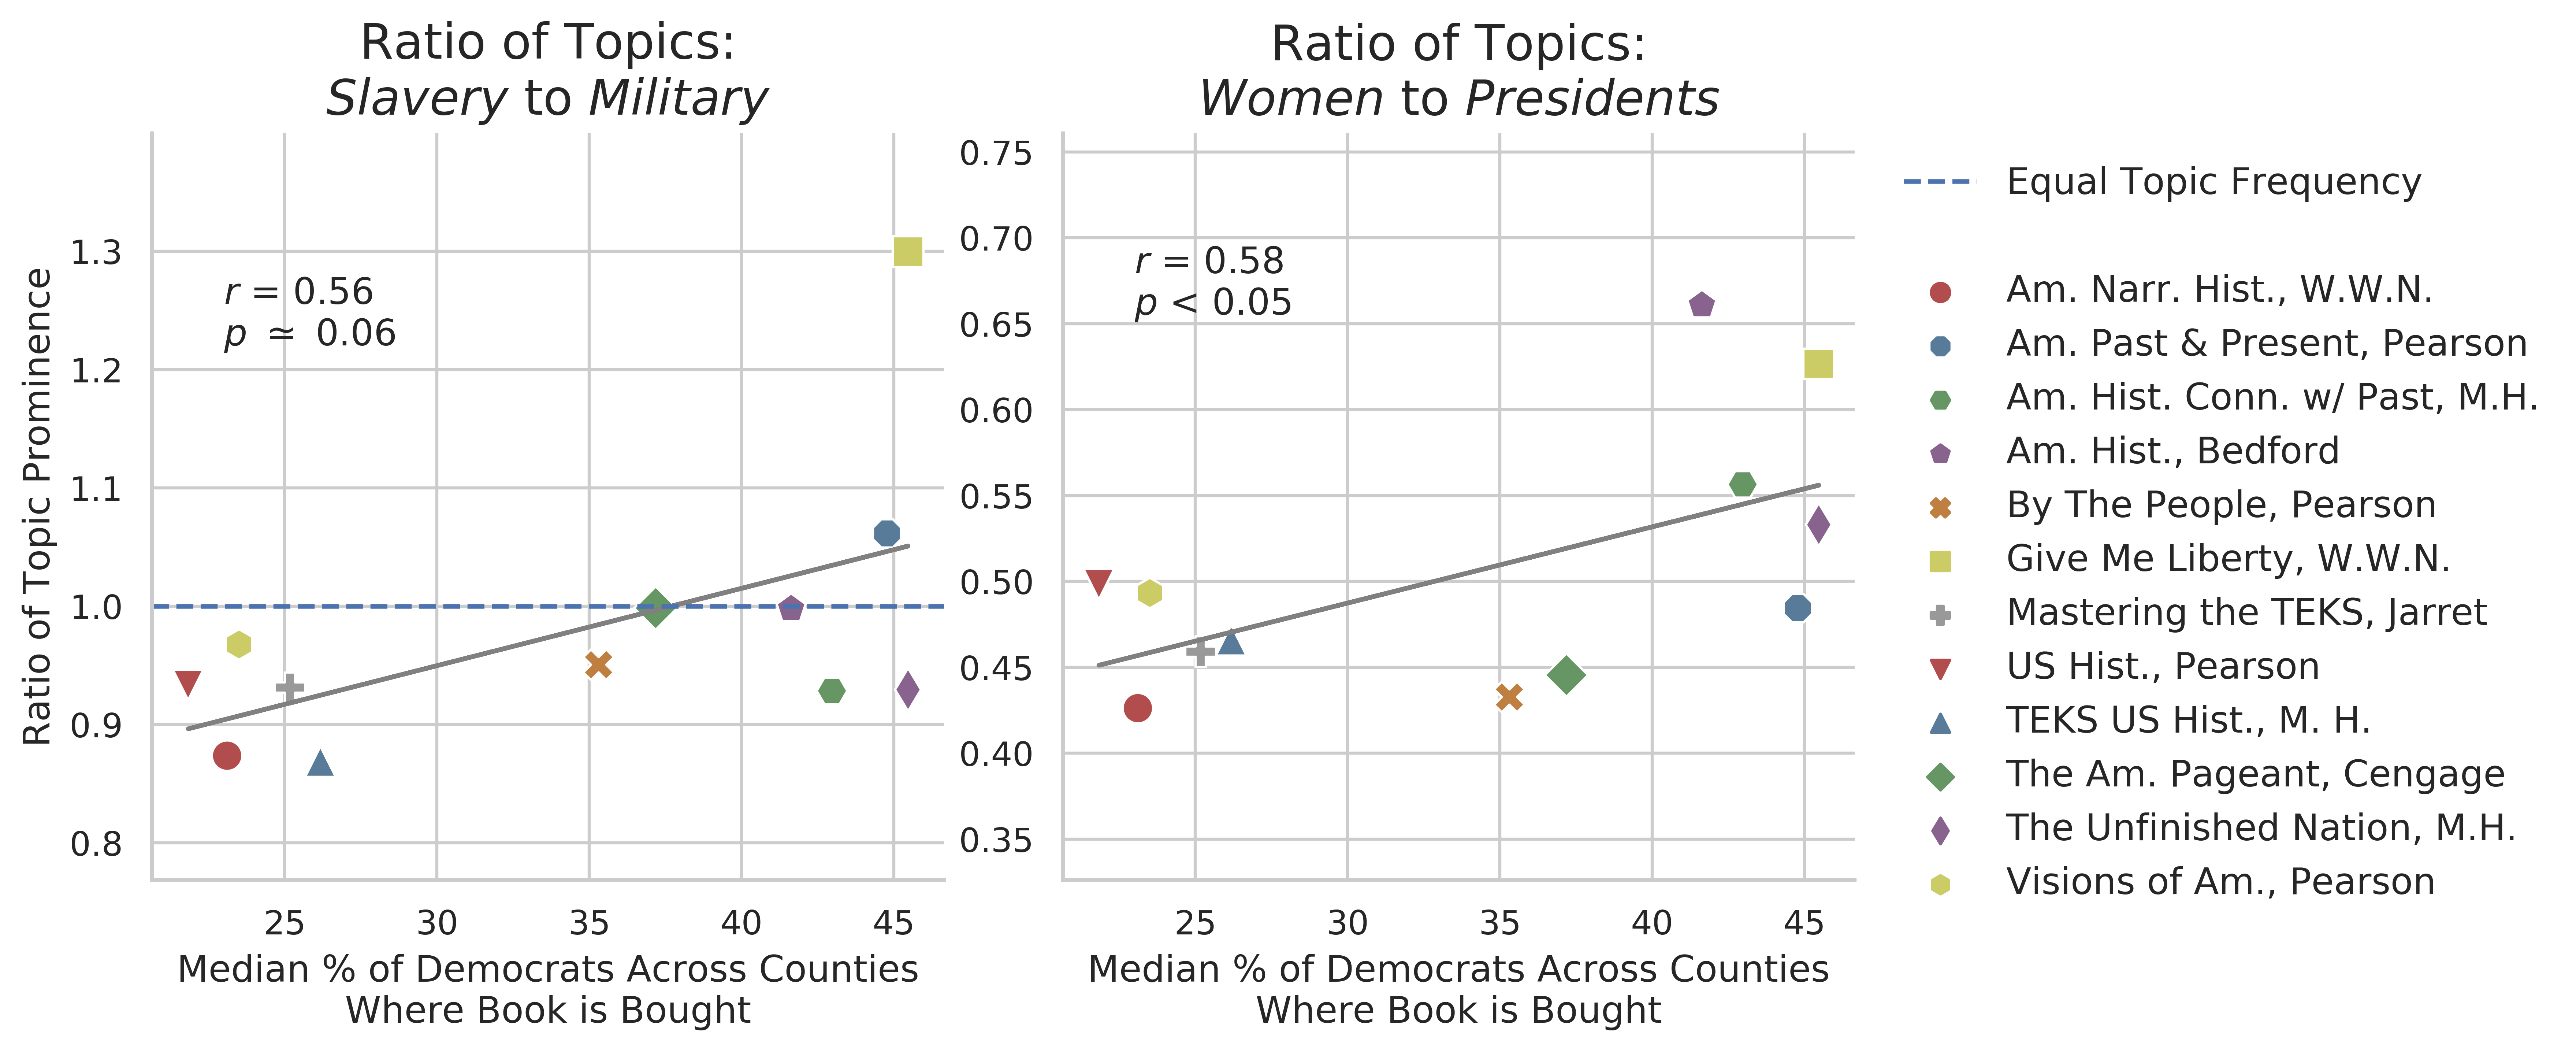

In [227]:
sns.set(style='whitegrid')
sns.despine()
fontsize=12
fig = plt.figure(figsize=(10, 4.5), dpi=600)
gs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, wspace=0.15)
ax1 = fig.add_subplot(gs[0, 0])
title1 = "Ratio of Topics:\n$\it{"+name1 + "}$ to $\it{"+name2+"}$"
plot_on_axis(slavery_df, ax1, title1, fontsize=fontsize, show_ylabel=True,
             p_value_show="$\simeq$ 0.06", p_val_pos=1.22)
ax2 = fig.add_subplot(gs[0, 1:3])
title2 = "Ratio of Topics:\n$\it{Women}$ to $\it{Presidents}$"
plot_on_axis(women_df, ax2, title2, show_legend="full", fontsize=fontsize, show_ylabel=False,
             p_value_show="< 0.05", p_val_pos=.655)
l = plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", frameon=False, fontsize=fontsize)
l.texts[1].set_text('')
plt.savefig("results/figure8_topic_ratios.pdf", dpi=800, format="pdf", bbox_inches="tight")

# Most prominent topics

In [200]:
def get_most_prominent(num_topics):
    allt = np.zeros((len(titles), num_topics))
    idx = 0
    for title in titles:
        allt[idx, :] = load_counts(title)
        allt[idx, :] /= np.sum(allt[idx, :] )
        idx +=1
    across_books = np.mean(allt, axis=0)
    for t in across_books.argsort()[::-1]:
        print(round(across_books[t], 4),'\t', topic_names[str(t)])

In [201]:
get_most_prominent(num_topics)

0.024 	 read,inform,sourc,newspap,write,book,chapter,map,publish,learn
0.0228 	 explain,identifi,role,describ,effect,event,analyz,play,import,impact
0.0227 	 man,hand,boy,thing,back,day,eye,told,cloth,dress
0.0222 	 unit,war,world,state,nation,civil,end,power,america,year
0.022 	 armi,general,confeder,troop,union,forc,command,battl,british,victori
0.0219 	 centuri,industri,chang,growth,develop,economi,econom,revolut,region,increas
0.0217 	 water,river,cattl,miner,mountain,gold,mine,food,west,forest
0.0212 	 european,north,america,spanish,explor,empir,europ,trade,spain,africa
0.0212 	 debat,conflict,tension,polit,issu,continu,divis,cold war,era,controversi
0.0211 	 african,black,slave,white,southern,free,south,american,slaveri,northern
0.0211 	 human,natur,man,person,thing,moral,reason,believ,good,individu
0.021 	 constitut,right,amend,vote,citizen,convent,deleg,state,bill,congress
0.021 	 popular,show,imag,paint,artist,photograph,depict,music,televis,audienc
0.021 	 peopl,freedom,liber

In [202]:
def get_most_prominent2(num_topics):
    counts = load_counts()
    print(counts)
    proportion = counts / counts.sum()
    for t in proportion.argsort()[::-1]:
        print(round(proportion[t], 4),'\t', topic_names[str(t)])

In [203]:
get_most_prominent2(num_topics)

[15337. 15634. 14829. 15291. 16088. 15990. 14309. 17254. 15043. 18253.
 16687. 16689. 16963. 14719. 17265. 15825. 15065. 15329. 16120. 15751.
 15381. 16833. 17608. 15350. 17030. 14875. 15684. 14459. 14046. 14895.
 14576. 14666. 16042. 15080. 18292. 16744. 15818. 17617. 16668. 16781.
 16817. 16389. 15165. 15670. 17315. 15962. 15452. 17831. 14897. 14741.]
0.0229 	 man,hand,boy,thing,back,day,eye,told,cloth,dress
0.0229 	 read,inform,sourc,newspap,write,book,chapter,map,publish,learn
0.0224 	 explain,identifi,role,describ,effect,event,analyz,play,import,impact
0.0221 	 centuri,industri,chang,growth,develop,economi,econom,revolut,region,increas
0.0221 	 unit,war,world,state,nation,civil,end,power,america,year
0.0217 	 democrat,parti,republican,elect,vote,candid,won,voter,major,popular
0.0217 	 debat,conflict,tension,polit,issu,continu,divis,cold war,era,controversi
0.0216 	 armi,general,confeder,troop,union,forc,command,battl,british,victori
0.0214 	 human,natur,man,person,thing,moral,reas

## Pmi

In [146]:
pmi_all = load_pmi()

In [167]:
topics = get_topic_for_word("women")

0 women,right,movement,civil,equal,vote,african,abolitionist,organ,polit
35 women,men,children,famili,work,young,husband,woman,mother,marri


In [168]:
np.mean([pmi_all[i,j] for j in topics for i in topics if j != i])

-0.22506526203890154

In [169]:
topics = get_topic_for_word("black")

6 black,african,white,civil,american,southern,south,right,king,segreg
9 kill,protest,polic,march,student,mob,black,demonstr,violenc,riot
30 slave,black,free,african,white,planter,southern,slaveri,former,plantat


In [170]:
np.mean([pmi_all[i,j] for j in topics for i in topics if j != i])

-0.25369499827997544

In [171]:
topics = get_topic_for_word(",men")

19 man,said,everi,men,god,wrote,upon,countri,one,negro
35 women,men,children,famili,work,young,husband,woman,mother,marri


In [172]:
np.mean([pmi_all[i,j] for j in topics for i in topics if j != i])

-0.14404568993064792